In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
class CustomDense(tf.keras.layers.Layer):
    
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units
    
    def build(self, input_shape):
        self.w = self.add_weight(shape = (input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape = (self.units,), initializer="random_normal", trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [3]:
inputs = Input((4,))
outputs = CustomDense(10)(inputs)

In [4]:
# model = Model(inputs, outputs)
# model.summary()

In [5]:
INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model

In [6]:
# model = create_model()
# model.summary()

In [7]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    return images, labels

def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    oh_labels = to_categorical(labels)
    return images, oh_labels

def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

In [8]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [9]:
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [10]:
model = create_model()
model.summary()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=20, validation_data=(val_images, val_oh_labels))

Epoch 1/20
1594/1594 [==============================] - 2s 945us/step - loss: 0.5439 - accuracy: 0.8092 - val_loss: 0.4253 - val_accuracy: 0.8471
Epoch 2/20
1594/1594 [==============================] - 2s 944us/step - loss: 0.3927 - accuracy: 0.8602 - val_loss: 0.4079 - val_accuracy: 0.8466
Epoch 3/20
1594/1594 [==============================] - 2s 955us/step - loss: 0.3510 - accuracy: 0.8738 - val_loss: 0.3761 - val_accuracy: 0.8668
Epoch 4/20
1594/1594 [==============================] - 1s 895us/step - loss: 0.3271 - accuracy: 0.8806 - val_loss: 0.3575 - val_accuracy: 0.8691
Epoch 5/20
1594/1594 [==============================] - 1s 873us/step - loss: 0.3113 - accuracy: 0.8863 - val_loss: 0.3437 - val_accuracy: 0.8727
Epoch 6/20
1594/1594 [==============================] - 1s 893us/step - loss: 0.2957 - accuracy: 0.8918 - val_loss: 0.3600 - val_accuracy: 0.8700
Epoch 7/20
1594/1594 [==============================] - 1s 892us/step - loss: 0.2824 - accuracy: 0.8965 - val_loss: 0.3201 -

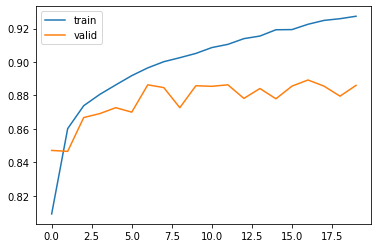

In [12]:
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [13]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 901us/step - loss: 0.3666 - accuracy: 0.8877


[0.36655867099761963, 0.8877000212669373]